# Fake news detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

## Data cleaning and preparation

In [5]:
# Add flag to track fake and real
fake['target'] = 0#'fake'
true['target'] = 1#'true'

In [6]:
# Concatenate dataframes
# Reset the index of the DataFrame, and use the default one instead. 
# If the DataFrame has a MultiIndex, this method can remove one or more levels.
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
data

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [8]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [9]:
# Check the data
data

,title,text,subject,date,target
0,Extension of Iran Sanctions Act passes U.S. Co...,WASHINGTON (Reuters) - The U.S. Senate passed ...,politicsNews,"December 1, 2016",1
1,Strong economic report welcome boost for Clint...,"MANCHESTER, N.H. (Reuters) - A stronger-than-e...",politicsNews,"October 28, 2016",1
2,WATCH: Trump Blames Puerto Ricans For Recover...,Donald Trump insulted the people of Puerto Ric...,News,"October 3, 2017",0
3,Clinton holds slim lead over Trump in presiden...,WASHINGTON (Reuters) - Democrat Hillary Clinto...,politicsNews,"November 3, 2016",1
4,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
...,...,...,...,...,...
44893,WATCH: RACIST RAPPER WHO HUNG WHITE KID In Lat...,Rapper XXXTentacion released a controversial v...,politics,"Sep 17, 2017",0
44894,Former McCain Chief Of Staff Thinks U.S. Need...,Things just keep getting stranger for Republic...,News,"May 11, 2017",0
44895,Bill Maher And Barney Frank Destroy GOP For C...,Bill Maher and Barney Frank totally schooled R...,News,"March 19, 2016",0
44896,Scotland can still offer choice on independenc...,"GLASGOW, Scotland (Reuters) - Nicola Sturgeon ...",worldnews,"October 10, 2017",1


In [10]:
# Removing the date 
data.drop(["date"], axis=1, inplace=True)
data.head()

,title,text,subject,target
0,Extension of Iran Sanctions Act passes U.S. Co...,WASHINGTON (Reuters) - The U.S. Senate passed ...,politicsNews,1
1,Strong economic report welcome boost for Clint...,"MANCHESTER, N.H. (Reuters) - A stronger-than-e...",politicsNews,1
2,WATCH: Trump Blames Puerto Ricans For Recover...,Donald Trump insulted the people of Puerto Ric...,News,0
3,Clinton holds slim lead over Trump in presiden...,WASHINGTON (Reuters) - Democrat Hillary Clinto...,politicsNews,1
4,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,1


In [11]:
# Removing the title 
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - The U.S. Senate passed ...,politicsNews,1
1,"MANCHESTER, N.H. (Reuters) - A stronger-than-e...",politicsNews,1
2,Donald Trump insulted the people of Puerto Ric...,News,0
3,WASHINGTON (Reuters) - Democrat Hillary Clinto...,politicsNews,1
4,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,1


In [12]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data

,text,subject,target
0,washington (reuters) - the u.s. senate passed ...,politicsNews,1
1,"manchester, n.h. (reuters) - a stronger-than-e...",politicsNews,1
2,donald trump insulted the people of puerto ric...,News,0
3,washington (reuters) - democrat hillary clinto...,politicsNews,1
4,(reuters) - puerto rico governor ricardo rosse...,politicsNews,1
...,...,...,...
44893,rapper xxxtentacion released a controversial v...,politics,0
44894,things just keep getting stranger for republic...,News,0
44895,bill maher and barney frank totally schooled r...,News,0
44896,"glasgow, scotland (reuters) - nicola sturgeon ...",worldnews,1


In [13]:
# Remove punctuation

import string

# string.punctuation- !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation] # List of strings- ['r','i','c','h',..]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [14]:
# Check
data.head()

,text,subject,target
0,washington reuters the us senate passed a 10y...,politicsNews,1
1,manchester nh reuters a strongerthanexpected ...,politicsNews,1
2,donald trump insulted the people of puerto ric...,News,0
3,washington reuters democrat hillary clinton m...,politicsNews,1
4,reuters puerto rico governor ricardo rossello...,politicsNews,1


#### Removing stopwords - 'a', 'the', 'is', 'are'
import nltk
nltk.download('stopwords')

In [15]:

from nltk.corpus import stopwords
stop = stopwords.words('english')
# print(stop)

#data['text'] = data['text'].apply(funct) 
# x.split :
# txt = "Welcome to the jungle, baby!"
# txt.split()
# Output:
# ["Welcome", "to", "the", "jungle," "baby!"]

In [16]:
funct = lambda x: ' '.join([word for word in x.split() if word not in (stop)])

In [17]:
data.head()

,text,subject,target
0,washington reuters the us senate passed a 10y...,politicsNews,1
1,manchester nh reuters a strongerthanexpected ...,politicsNews,1
2,donald trump insulted the people of puerto ric...,News,0
3,washington reuters democrat hillary clinton m...,politicsNews,1
4,reuters puerto rico governor ricardo rossello...,politicsNews,1


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


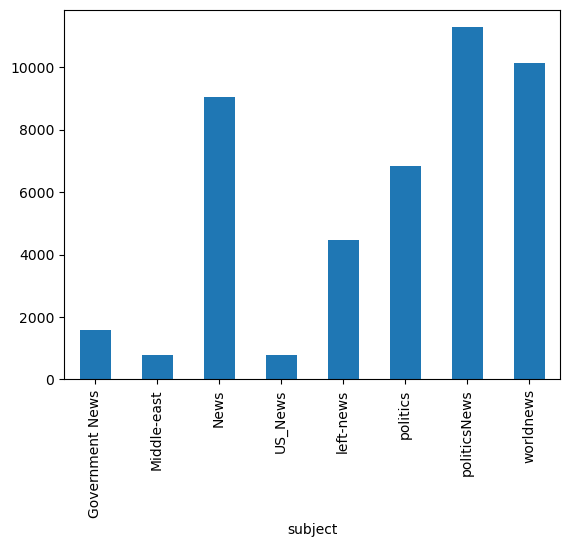

In [18]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
0    23481
1    21417
Name: text, dtype: int64


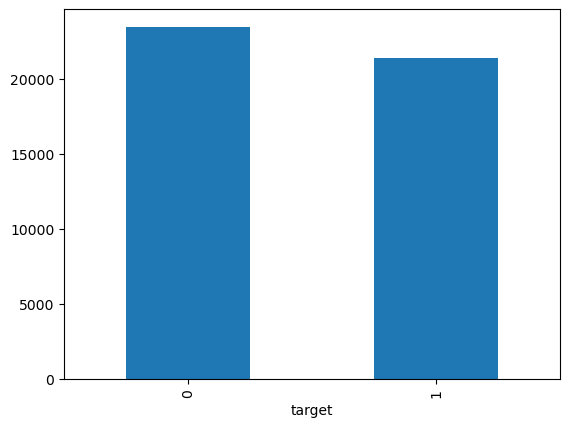

In [19]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

pip install wordcloud

In [20]:
from wordcloud import WordCloud

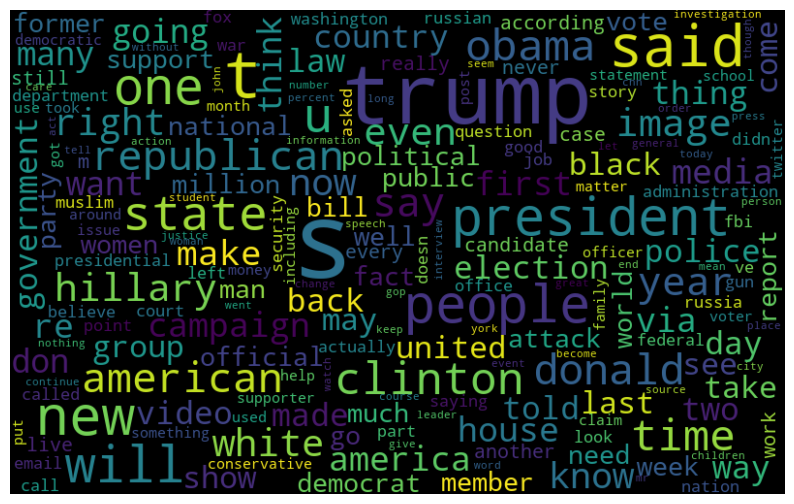

In [21]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == 0]#"fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

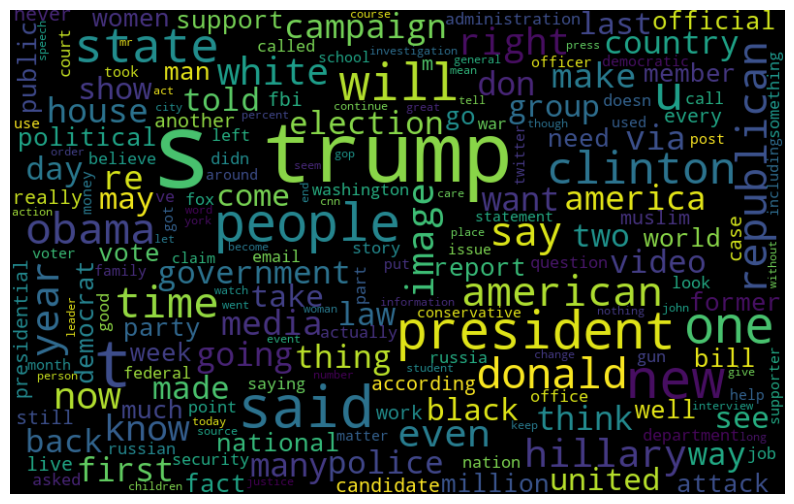

In [22]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == 1]#"true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize, FreqDist

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

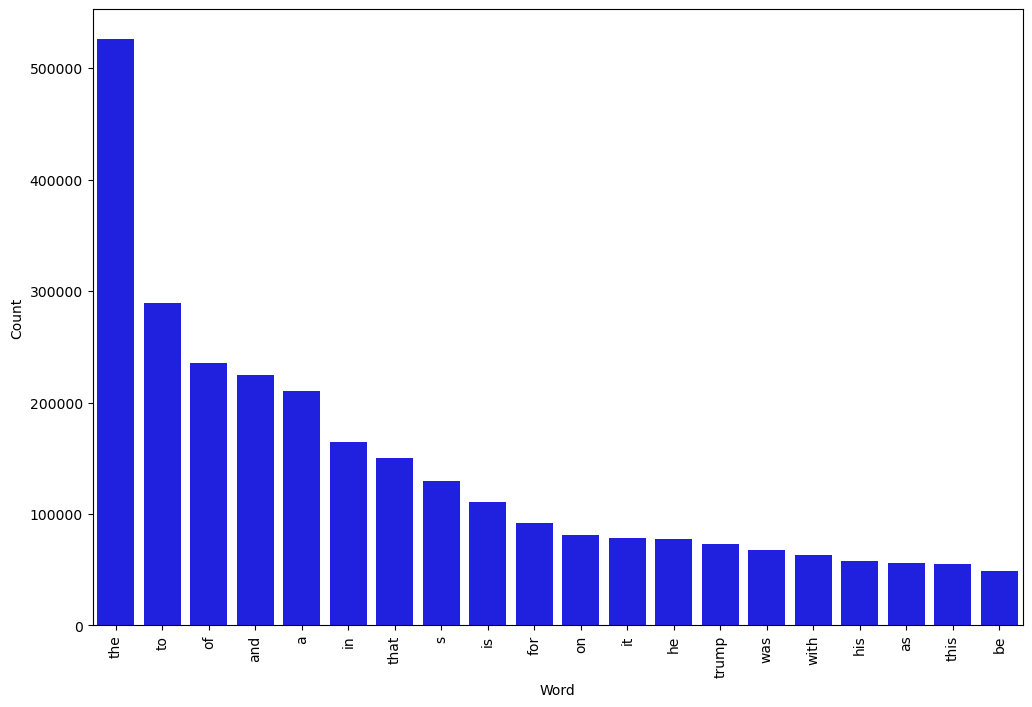

In [24]:
# Most frequent words in fake news
# counter(data[data["target"] == "fake"], "text", 20)
counter(data[data["target"] == 0], "text", 20)

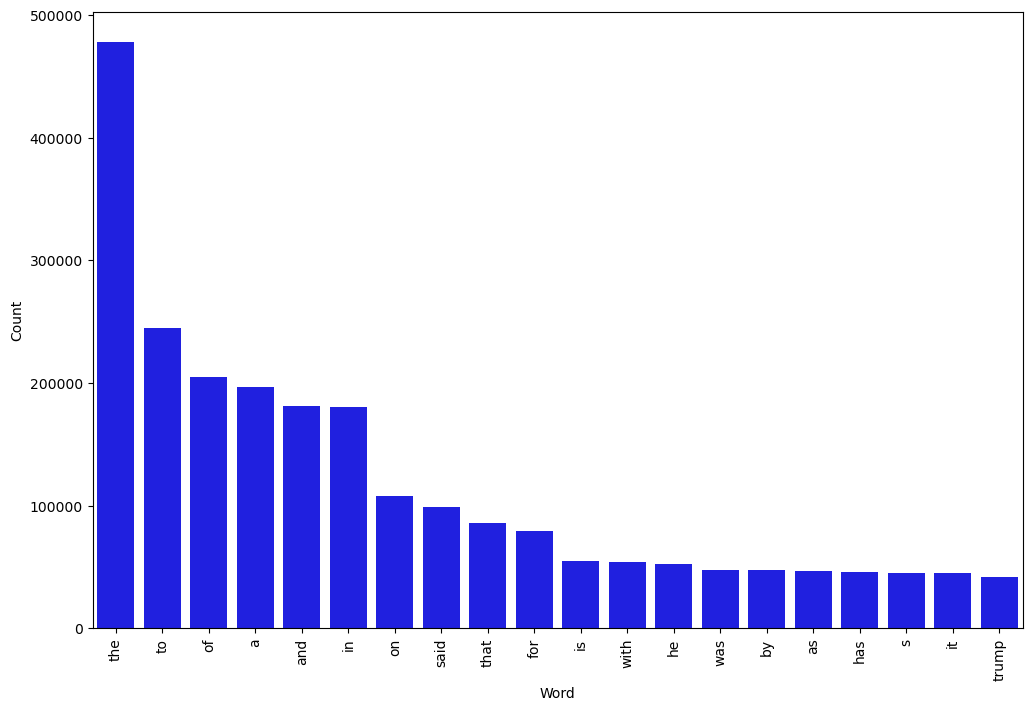

In [25]:
# Most frequent words in real news
# counter(data[data["target"] == "true"], "text", 20)
counter(data[data["target"] == 1], "text", 20)

## Modeling

In [26]:
from sklearn import metrics
import itertools

In [27]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [28]:
X = data['text']
y = data.target

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic regression

In [30]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.86%


Confusion matrix, without normalization


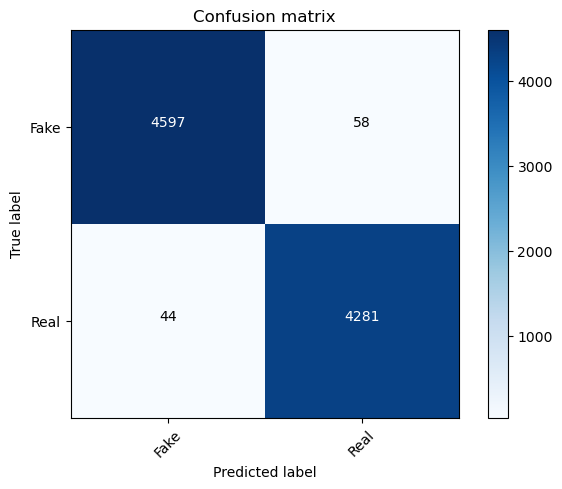

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Random Forest Classifier

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.ensemble import RandomForestClassifier

cv = CountVectorizer()
X_train_new = cv.fit_transform(X_train)
X_test_new = cv.transform(X_test)

model = RandomForestClassifier(n_estimators=50, criterion="entropy")
model.fit(X_train_new, y_train)
prediction = model.predict(X_test_new)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cross_val_score(model, X_test_new, y_test, cv=10).mean()

accuracy: 98.45%


0.9723830734966594

Confusion matrix, without normalization


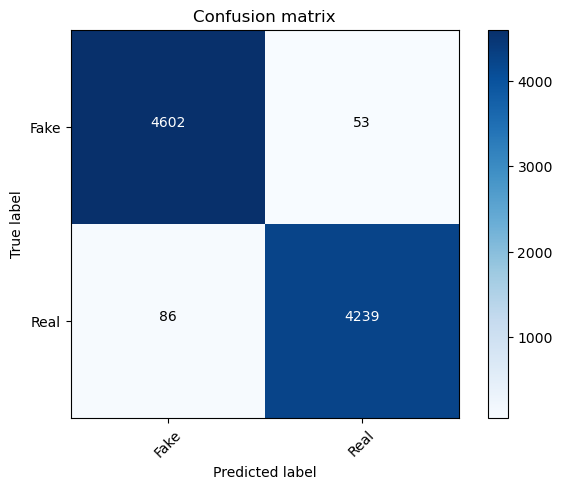

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(10, 60, 10),
                                'criterion': ['gini', 'entropy']},
                                cv=3,
                                 n_jobs=1,
                                scoring='neg_mean_squared_error')

gs.fit(X_train_new, y_train)

print(gs.best_params_)

KeyboardInterrupt: 

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

cv = CountVectorizer()
X_train_new = cv.fit_transform(X_train)
X_test_new = cv.transform(X_test)

model = DecisionTreeClassifier(criterion= 'gini', max_depth = 9, min_samples_split=20, splitter='best', random_state=42)
model.fit(X_train_new, y_train)
prediction = model.predict(X_test_new)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print("Cross Validation Score: ", cross_val_score(model, X_test_new, y_test, cv=10).mean())

# Hyperparameter Tuning

In [39]:
%pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 3.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24555 sha256=575d98c5999d741d737d17f5e30235e8d4562d79cb3ab1f833d8f97d0a13abd6
  Stored in directory: /Users/nithishreddy/Library/Caches/pip/wheels/bd/ce/e8/ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [41]:
%pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

Confusion matrix, without normalization


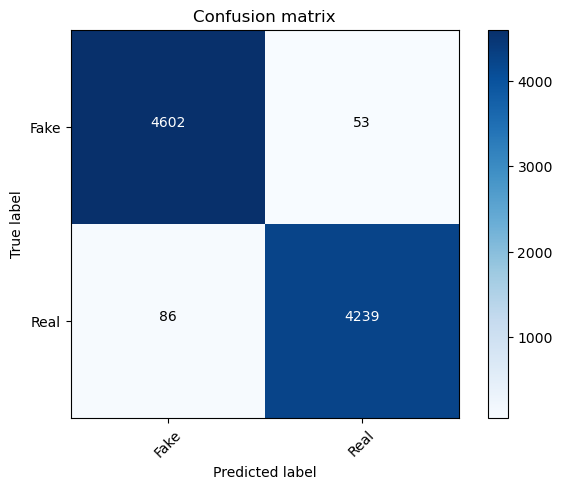

In [43]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [44]:
import joblib

In [45]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [46]:
joblib.dump(cv, 'cv.pkl')

['cv.pkl']